In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer

In [3]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

Просмотр набора данных

In [4]:
CLEARED_PATH = './flats_cleared.csv'
df = pd.read_csv(CLEARED_PATH, index_col='Код объекта')
df

,Комнатность,Ремонт,Балкон,Материал окон,Серия,Год постройки,Стены,url,Адрес,наземный паркинг,...,культуры,пешеходные бульвары,дороги,трассы,автомобильные мосты,Высота потолков,Общая площадь,этаж,всего этажей,цена
Код объекта,,,,,,,,,,,,,,,,,,,,,
5757236,1,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2017.0,Панельные,https://ptz.etagi.com//realty/5757236/,Древлянка,1,...,0,0,0,0,0,2.50,30.60,1,5,2390.0
5535905,1,Косметический ремонт,Нет балкона,Пластиковые,Общ,NaN,Кирпичные,https://ptz.etagi.com//realty/5535905/,Голиковка,0,...,0,0,0,0,0,2.55,18.00,4,5,920.0
4644398,3,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2021.0,Панельные,https://ptz.etagi.com//realty/4644398/,Древлянка,1,...,0,0,0,0,0,2.70,57.83,3,5,3250.0
5667276,2,Косметический ремонт,Лоджия,Пластиковые,Инд,2016.0,Монолитные,https://ptz.etagi.com//realty/5667276/,Ключевая,1,...,0,0,0,0,0,2.70,41.20,8,16,3590.0
4644417,4,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2021.0,Панельные,https://ptz.etagi.com//realty/4644417/,Древлянка,1,...,0,0,0,0,0,2.70,84.00,3,5,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671111,1,Косметический ремонт,Есть балкон,Пластиковые,Инд,2012.0,Панельные,https://ptz.etagi.com//realty/4671111/,Ключевая,1,...,0,0,0,0,0,2.50,36.60,3,5,2900.0
2886457,4,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2018.0,Монолитные,https://ptz.etagi.com//realty/2886457/,Центр,0,...,0,0,0,0,0,3.00,103.30,9,9,8990.0
5193363,1,Косметический ремонт,Есть балкон,Пластиковые,Инд,1963.0,Кирпичные,https://ptz.etagi.com//realty/5193363/,Октябрьский,1,...,0,0,0,0,0,2.50,30.60,1,5,2350.0


Распределение цен

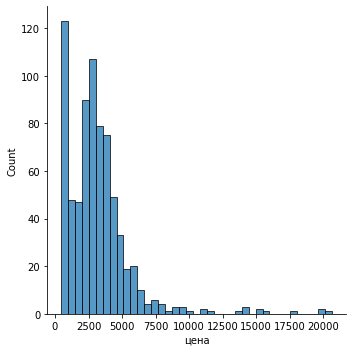

In [5]:
sns.displot(df['цена'])

Вывод "пустых" данных в процентном соотношении

In [6]:
df.isnull().mean() * 100

Комнатность               0.000000
Ремонт                    0.000000
Балкон                    0.000000
Материал окон             0.000000
Серия                     0.000000
Год постройки            22.554348
Стены                     0.000000
url                       0.000000
Адрес                     0.000000
наземный паркинг          0.000000
гостевой паркинг          0.000000
парковка отсутствует      0.000000
подземный паркинг         0.000000
гараж во дворе            0.000000
парковка                  0.000000
Двор                      0.000000
Железная дверь            0.000000
Счетчик воды              0.000000
во двор                   0.000000
на детскую площадку       0.000000
стены соседних домов      0.000000
памятники архитектуры     0.000000
культуры                  0.000000
пешеходные бульвары       0.000000
дороги                    0.000000
трассы                    0.000000
автомобильные мосты       0.000000
Высота потолков           0.135870
Общая площадь       

## Some insight

удаление url-адресов

In [7]:
train = df.copy()
train.drop(columns=['url'], inplace=True)
train

,Комнатность,Ремонт,Балкон,Материал окон,Серия,Год постройки,Стены,Адрес,наземный паркинг,гостевой паркинг,...,культуры,пешеходные бульвары,дороги,трассы,автомобильные мосты,Высота потолков,Общая площадь,этаж,всего этажей,цена
Код объекта,,,,,,,,,,,,,,,,,,,,,
5757236,1,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2017.0,Панельные,Древлянка,1,0,...,0,0,0,0,0,2.50,30.60,1,5,2390.0
5535905,1,Косметический ремонт,Нет балкона,Пластиковые,Общ,NaN,Кирпичные,Голиковка,0,1,...,0,0,0,0,0,2.55,18.00,4,5,920.0
4644398,3,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2021.0,Панельные,Древлянка,1,1,...,0,0,0,0,0,2.70,57.83,3,5,3250.0
5667276,2,Косметический ремонт,Лоджия,Пластиковые,Инд,2016.0,Монолитные,Ключевая,1,0,...,0,0,0,0,0,2.70,41.20,8,16,3590.0
4644417,4,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2021.0,Панельные,Древлянка,1,1,...,0,0,0,0,0,2.70,84.00,3,5,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671111,1,Косметический ремонт,Есть балкон,Пластиковые,Инд,2012.0,Панельные,Ключевая,1,0,...,0,0,0,0,0,2.50,36.60,3,5,2900.0
2886457,4,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2018.0,Монолитные,Центр,0,0,...,0,0,0,0,0,3.00,103.30,9,9,8990.0
5193363,1,Косметический ремонт,Есть балкон,Пластиковые,Инд,1963.0,Кирпичные,Октябрьский,1,0,...,0,0,0,0,0,2.50,30.60,1,5,2350.0


boxplot всех дискретных столбцов

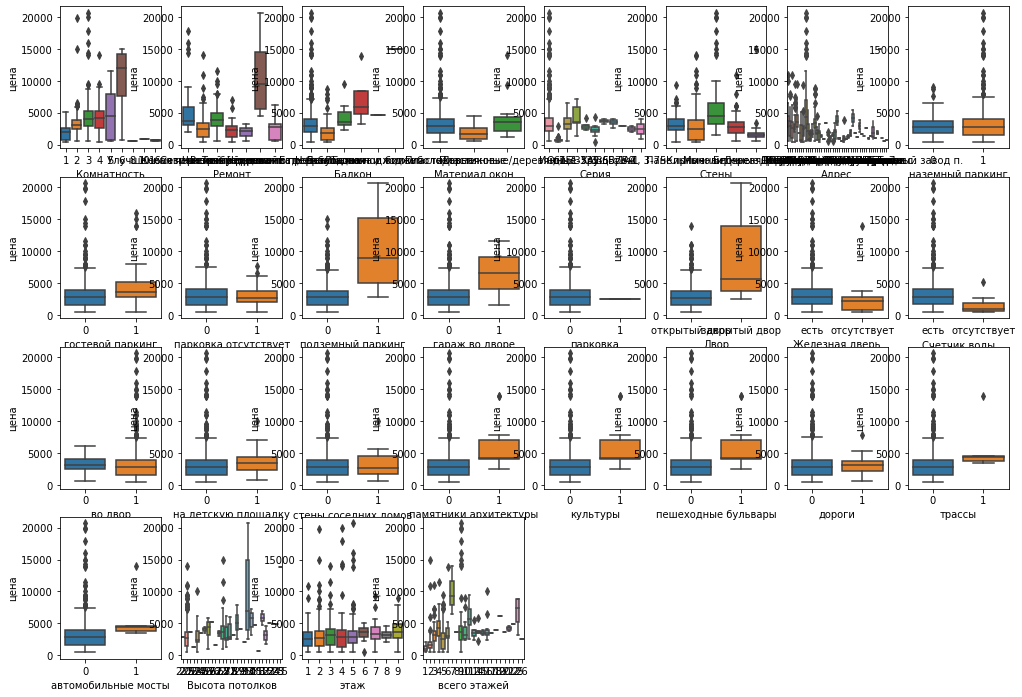

In [8]:
skip_column = ['Год постройки', 'цена', 'Общая площадь']
ncol = 1
plt.figure(figsize=(17,12))
for col in train.columns:
    if col in skip_column:
        continue
    plt.subplot(4, 8, ncol)
    sns.boxplot(data=train, x=col, y='цена')
    ncol += 1

### Очистка данных

Некоторые квартиры в датасэте - не квартиры, а комнаты. Ниже попытка вычислить эти комнаты и удалить их из набора данных

### These aren`t flat, these are all rooms
There is some bias becouse of such thing existing, should delete it

In [9]:
idx_to_drop = train[(train['Комнатность'] > 1) & (train['Общая площадь'] < 26)].index # this are rooms, not flats
train.drop(index=idx_to_drop, inplace=True)
train.shape

(718, 31)

In [10]:
#df.loc[4092393].url # do not drop this (I guess, it is flat after all)

In [11]:
ptz_address = ['Древлянка', 'Кукковка', 'Октябрьский', 'Голиковка', 
               'Перевалка', 'Центр', 'Ключевая', 'Зарека', 'Первомайский', 'Сулажгора']

In [12]:
# in address not in ptz, I will drop it anyway
idx_to_drop = train[(train['Общая площадь'] > 26) & (train['цена'] < 1000) & (train['Адрес'].isin(ptz_address))].index
#idx_to_drop.drop(4092393)
train.drop(index=idx_to_drop, inplace=True)
train.shape

(712, 31)

Распределение цен

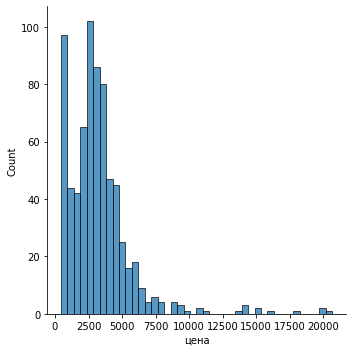

In [13]:
sns.displot(train['цена'])

Попытка обработать пропущенные данные(Эти способы не увенчались успехом)

Сравниваются графики между собой(визуально)

# Input NaN
dropping column 'Год постройки' and dropping row contains NaN values shows worse result

#### Maybe I can handle somehow years?

<AxesSubplot:xlabel='Год постройки', ylabel='цена'>

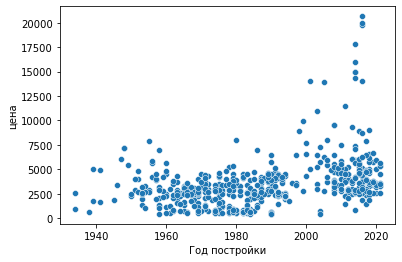

In [14]:
x=train['Год постройки']
y=train['цена']
sns.scatterplot(x=x,y=y)

<AxesSubplot:xlabel='Год постройки', ylabel='цена'>

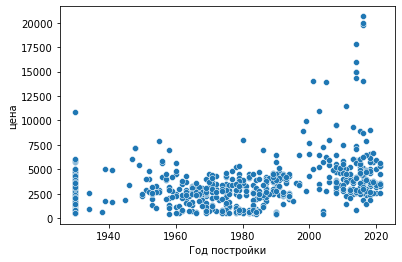

In [15]:
filled = x.fillna(1930) # just to see data on scatterplot with the rest of data
sns.scatterplot(x=filled, y=y)

<AxesSubplot:xlabel='Год постройки', ylabel='цена'>

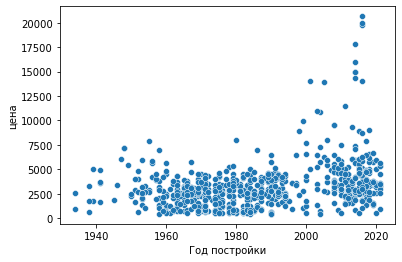

In [16]:
filled = x.fillna(method='bfill')
sns.scatterplot(x=filled, y=y)

<AxesSubplot:xlabel='Год постройки', ylabel='цена'>

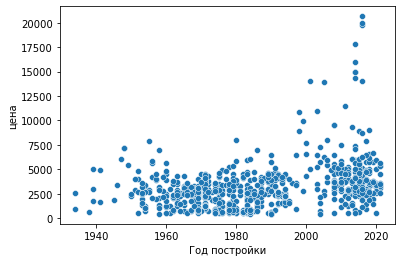

In [17]:
filled = x.fillna(method='ffill')
sns.scatterplot(x=filled, y=y)

In [18]:
#print((x>1996).sum()) #188
#(filled>1996).sum() # 242

188


242

In [19]:
train.loc[5535905]

Комнатность                                 1
Ремонт                   Косметический ремонт
Балкон                            Нет балкона
Материал окон                     Пластиковые
Серия                                     Общ
Год постройки                             NaN
Стены                               Кирпичные
Адрес                               Голиковка
наземный паркинг                            0
гостевой паркинг                            1
парковка отсутствует                        0
подземный паркинг                           0
гараж во дворе                              0
парковка                                    0
Двор                            открытый двор
Железная дверь                           есть
Счетчик воды                      отсутствует
во двор                                     1
на детскую площадку                         0
стены соседних домов                        0
памятники архитектуры                       0
культуры                          

In [20]:
filled[5535905]

2017.0

Общежитие 2017 года - это лишь вредит дате, нужен другой способ вставки года постройки

## The problem is, that flat with (Серия == Общ) cannot be the year of 2017
So i need better way of imputting the missed values

#### imput values based on type of flat

вставляю медианные значения, в зависимости от типа квартиры

In [21]:
filled = df['Год постройки'].fillna(df.groupby('Серия')['Год постройки'].transform('median'))

<AxesSubplot:xlabel='Год постройки', ylabel='цена'>

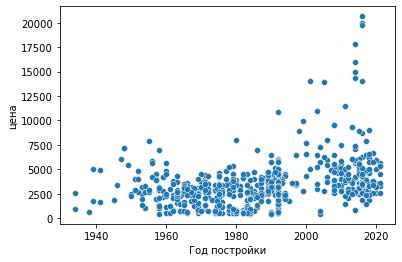

In [22]:
sns.scatterplot(x=filled, y=y)

In [23]:
filled_df = train.copy()
filled_df['Год постройки'] = filled

## Input one missed value
Though there is no real difference becouse of one row

In [24]:
median = filled_df['Высота потолков'].median()

In [25]:
filled_df['Высота потолков'].fillna(median, inplace=True)

In [26]:
filled_df.shape

(712, 31)

dropna should not change shape of df since I imputed all NaNs

In [27]:
filled_df = filled_df.dropna(axis=0)
filled_df.shape

(712, 31)

In [28]:
#print((x>1996).sum()) # 188
#(filled>1996).sum() # 189

188


189

# Find important columns

Чтобы найти важные колонны, выполняется ANOVA тест (Дисперсионный анализ)

In [29]:
def score_ANOVA(data, col_name, min_samples_per_group=5):
    '''
    perform ANOVA test. col_name used for creating (and checking) groups with this specific column.
    if column have not enough samples per group, this column will be skipped
    return 3 lists:    
    cols_with_big_p_value - p_value < 0.01;
    cols_with_small_p_value - p_value < 0.05;
    in other cases cols_that_need_further_investigation
    '''
    cols_that_need_further_investigation = []    
    cols_with_big_p_value = []
    cols_with_small_p_value = []
    for col in data.columns:
        if col == col_name:
            continue
        df = data[[col,col_name]]
        grouped_col_price = df.groupby([col],as_index=False) 
        uniques_col_values = df[col].unique()
        if len(uniques_col_values) == 1:
            print(f'({col}) has only one value! Skipping...')
            continue
        args = [grouped_col_price.get_group(uniques_col_values[i])[col_name] for i in range(len(uniques_col_values))]
        enough_samples = [args[i] for i in range(len(args)) # score ANOVA for groups that have at least min_samples_per_group
                          if len(args[i]) >= min_samples_per_group]
        if len(enough_samples) < 2:
            print(f'{col} has not enough samples per group, skipping')
            continue
        f_val, p_val = stats.f_oneway(*enough_samples)
        if p_val < 0.05:
            cols_with_small_p_value.append([col, f_val, p_val])
        elif p_val < 0.01:
            cols_with_big_p_value.append([col, f_val, p_val])
        else:
            cols_that_need_further_investigation.append([col, f_val, p_val])
    
    cols_with_big_p_value.sort(key=lambda x:x[2], reverse=True)
    cols_with_small_p_value.sort(key=lambda x:x[2], reverse=True)
    return cols_with_big_p_value, cols_with_small_p_value, cols_that_need_further_investigation

In [30]:
weak_p, strong_p, need_investigate =  score_ANOVA(filled_df,'цена')

гараж во дворе has not enough samples per group, skipping
парковка has not enough samples per group, skipping


In [31]:
strong_p

[['трассы', 6.325766459666777, 0.012119364363364893],
 ['автомобильные мосты', 6.325766459666777, 0.012119364363364893],
 ['Материал окон', 7.006266532459412, 0.0009702757629233047],
 ['Счетчик воды', 13.58841264961971, 0.0002449335771600645],
 ['гостевой паркинг', 14.1800607316099, 0.00017987419281393168],
 ['памятники архитектуры', 14.903000554531541, 0.00012350619529324664],
 ['культуры', 14.903000554531541, 0.00012350619529324664],
 ['пешеходные бульвары', 14.903000554531541, 0.00012350619529324664],
 ['Балкон', 16.57219238043473, 9.274723077502964e-08],
 ['всего этажей', 8.701714116796884, 1.733281281911861e-13],
 ['Серия', 19.68286996280938, 2.731035394344149e-21],
 ['Стены', 32.32415887229759, 9.138397139437362e-25],
 ['Адрес', 10.461408140757927, 4.227730152375989e-25],
 ['Год постройки', 6.2735676222074925, 1.121221712180817e-27],
 ['Общая площадь', 13.220560774005751, 1.014379177330684e-29],
 ['Высота потолков', 33.94329473615298, 7.275560312339294e-36],
 ['Двор', 200.3573824

In [32]:
weak_p

[]

In [33]:
need_investigate

[['наземный паркинг', 2.661147532014957, 0.10326997908384336],
 ['парковка отсутствует', 3.3302358839725237, 0.06843716604451312],
 ['Железная дверь', 2.6154356877010363, 0.10627262271680697],
 ['во двор', 0.007134257098447874, 0.932710911606282],
 ['на детскую площадку', 0.8610206691564201, 0.3537685530200745],
 ['стены соседних домов', 0.09762276767936828, 0.7547930161805503],
 ['дороги', 0.002930747499827535, 0.956841737618592],
 ['этаж', 1.1910896997101172, 0.30149830841297354]]

In [34]:
cols_after_ANOVA = [col[0] for col in strong_p]
print(cols_after_ANOVA)

['трассы', 'автомобильные мосты', 'Материал окон', 'Счетчик воды', 'гостевой паркинг', 'памятники архитектуры', 'культуры', 'пешеходные бульвары', 'Балкон', 'всего этажей', 'Серия', 'Стены', 'Адрес', 'Год постройки', 'Общая площадь', 'Высота потолков', 'Двор', 'Комнатность', 'подземный паркинг', 'Ремонт']


# Find outliers

Поиск выбросов не увенчался успехом. Вернее, выбросы были, но их удаление приводило к ухудшению результатов. Вероятно, маленький набор данных?

In [35]:
selected_columns_df = filled_df[cols_after_ANOVA]
selected_columns_df.shape

(712, 20)

boxplot, но уже после преобразований

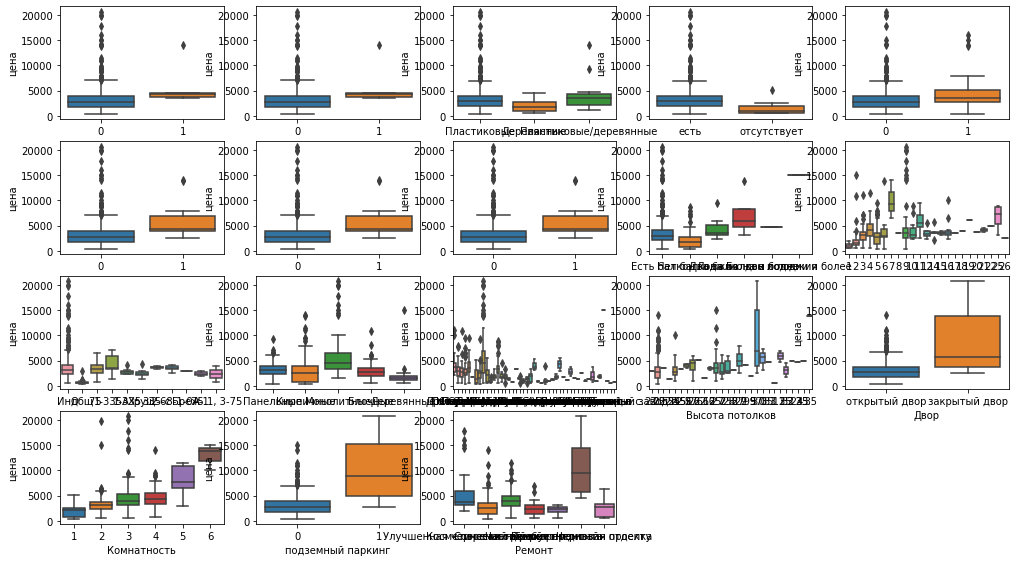

In [36]:
ncol = 1
plt.figure(figsize=(17,12))
for col in selected_columns_df:
    if col in skip_column:
        continue
    plt.subplot(5, 5, ncol)
    sns.boxplot(data=selected_columns_df, x=col, y=y)
    ncol += 1

In [37]:
y = pd.Series(df['цена'], index=selected_columns_df.index)

In [38]:
sel_df_with_y = selected_columns_df.join(y)

Непосредственный поиск граничных значений выбросов

In [39]:
Q1 = sel_df_with_y.quantile(0.25)
Q3 = sel_df_with_y.quantile(0.75)
IQR = Q3 - Q1
below_border = Q1 - 1.5*IQR
upper_border = Q3 + 1.5*IQR

In [40]:
below_border

трассы                      0.000
автомобильные мосты         0.000
гостевой паркинг            0.000
памятники архитектуры       0.000
культуры                    0.000
пешеходные бульвары         0.000
всего этажей               -1.000
Год постройки            1937.125
Общая площадь              -9.500
Высота потолков             2.500
Комнатность                -2.000
подземный паркинг           0.000
цена                    -1413.375
dtype: float64

In [41]:
upper_border

трассы                      0.000
автомобильные мосты         0.000
гостевой паркинг            0.000
памятники архитектуры       0.000
культуры                    0.000
пешеходные бульвары         0.000
всего этажей               15.000
Год постройки            2038.125
Общая площадь             106.500
Высота потолков             2.500
Комнатность                 6.000
подземный паркинг           0.000
цена                     7235.625
dtype: float64

In [42]:
idx_to_drop = sel_df_with_y[sel_df_with_y['цена'] > 7235.625].index
sel_df_with_y.drop(index=idx_to_drop, inplace=True)
sel_df_with_y.shape

(682, 21)

dropping all groups contains 'Общ' is no good

In [43]:
#idx_to_drop = selected_columns[selected_columns['Серия'] == 'Общ'].index
#selected_columns.drop(index=idx_to_drop, inplace=True)
#selected_columns.shape

### Do not drop other outliers
for some reasons, model perform better if I save this data

In [44]:
# idx_to_drop = selected_columns[selected_columns['Общая площадь'] > 106.5].index
# selected_columns.drop(index=idx_to_drop, inplace=True)
# selected_columns.shape

In [45]:
# idx_to_drop = selected_columns[selected_columns['Высота потолков'] < 2.5].index
# selected_columns.drop(index=idx_to_drop, inplace=True)
# selected_columns.shape

In [46]:
# idx_to_drop = selected_columns[selected_columns['всего этажей'] > 15].index
# selected_columns.drop(index=idx_to_drop, inplace=True)
# selected_columns.shape

In [47]:
# idx_to_drop = selected_columns[selected_columns['Год постройки'] < 1937].index
# selected_columns.drop(index=idx_to_drop, inplace=True)
# selected_columns.shape

## Handle address
Drop address if I do n ot have enough examples about it

In [48]:
sel_df_with_y['Адрес'].value_counts()

Древлянка                          97
Кукковка                           78
Октябрьский                        66
Голиковка                          65
Перевалка                          62
Центр                              57
Ключевая                           50
Зарека                             49
Первомайский                       33
Сулажгора                          22
Кондопога                          16
5-й посёлок                         7
Мелиоративный п.                    7
Соломенное                          7
Деревянка п.                        6
Железнодорожный                     6
Новая Вилга п.                      6
Эссойла с.                          5
Кончезеро с.                        4
Птицефабрика                        3
Университетский городок             3
Шуя п.                              3
Великая губа с.                     3
Апатиты                             2
Чална                               2
Старая Кукковка                     2
Медвежьегорс

In [49]:
idx_to_drop_replace = sel_df_with_y.groupby('Адрес', as_index=False).filter(lambda x: len(x) < 17).index
adress_drop_df = sel_df_with_y.drop(index=idx_to_drop_replace)

### Looking on boxplots
after deleting bad rows

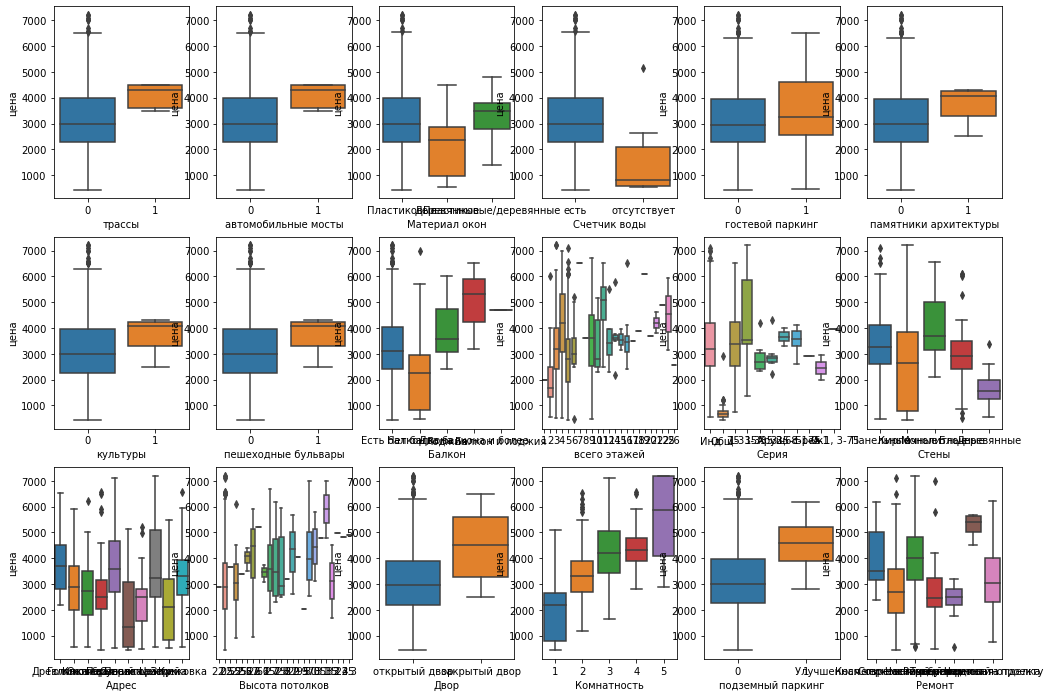

In [50]:
ncol = 1
plt.figure(figsize=(17,12))
for col in adress_drop_df:
    if col in skip_column:
        continue
    plt.subplot(3, 6, ncol)
    sns.boxplot(data=adress_drop_df, x=col, y=adress_drop_df['цена'])
    ncol += 1

### Address boxplot

<AxesSubplot:xlabel='Адрес', ylabel='цена'>

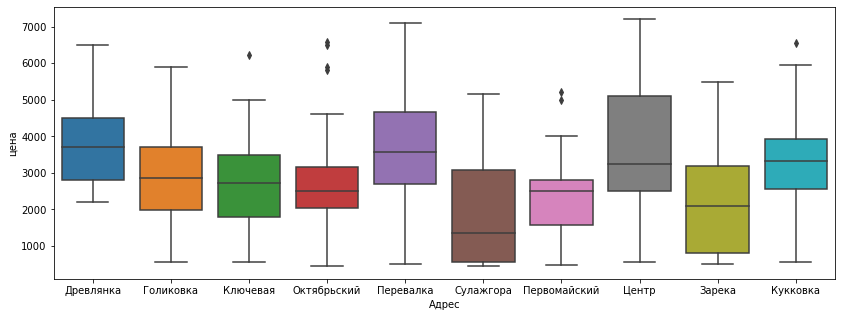

In [51]:
plt.figure(figsize=(14,5))
sns.boxplot(x=adress_drop_df['Адрес'], y=adress_drop_df['цена'])

In [52]:
adress_drop_df.shape

(579, 21)

# Prepare data

In [53]:
X = adress_drop_df.drop(columns=['цена'])
y = adress_drop_df['цена']
print(X.shape)
print(y.shape)

(579, 20)
(579,)


In [54]:
X_year_bins = X.copy()

Попытка найти лучшее возможное разбиение столбца "Год постройки". Используется разбиение на равные доли

## Binarizing year of building

In [55]:
def best_bin_split(n):
    # use simlest model for speed
    
    #model = DecisionTreeRegressor(random_state=42, max_depth=6, min_samples_split=8)
    model = LinearRegression()
    best_score = float('-inf')
    best_bin_split = 0
    best_params = None
    for n_bins in range(2,n):
        bins = np.linspace(X['Год постройки'].min(), X['Год постройки'].max(), n_bins) # 5
        year = pd.cut(X['Год постройки'], bins=bins)
        X_year_bins['Год постройки'] = year
        X_dummy = pd.get_dummies(X_year_bins)
        score = cross_val_score(model, X_dummy, y, cv=4)
        if score.mean() > best_score:
            best_score = score.mean()
            best_bin_split = n_bins
    # return None if results are better without splitting
    no_split_score = cross_val_score(model, pd.get_dummies(X), y, cv=4)
    if no_split_score.mean() > best_bin_split:
        return None
    return best_bin_split

In [56]:
bin_split = best_bin_split(8) # function return None if splitting make things worse...

In [57]:
bin_split # eventually, splitting make sense

5

### Splitting on 5 equally spaces is better then No splitting at all,
but it is unknown is it best possible splitting. Probably, not equally splitting will be better

But for now it is simple to realize

In [58]:
bins = np.linspace(X['Год постройки'].min(), X['Год постройки'].max(), bin_split) # 5
year = pd.cut(X['Год постройки'], bins=bins)
X_year_bins['Год постройки'] = year

## Label Encoding of column "Ремонт"

In [59]:
X_year_bins['Ремонт'].unique()

array(['Улучшенная черновая отделка', 'Косметический ремонт',
       'Современный ремонт', 'Частичный ремонт', 'Требует ремонта',
       'Ремонт по дизайн проекту', 'Черновая отделка'], dtype=object)

In [60]:
column_values = {'Черновая отделка' :0, 'Улучшенная черновая отделка' :1, 'Требует ремонта':2, 'Частичный ремонт':3,
                'Косметический ремонт':4, 'Современный ремонт':5, 'Ремонт по дизайн проекту':6}
X_labeled_renovation = X_year_bins['Ремонт'].replace(column_values)

In [61]:
X_renovation = X_year_bins.copy()
X_renovation['Ремонт'] = X_labeled_renovation
X_renovation.shape

(579, 20)

In [62]:
X_renovation

,трассы,автомобильные мосты,Материал окон,Счетчик воды,гостевой паркинг,памятники архитектуры,культуры,пешеходные бульвары,Балкон,всего этажей,Серия,Стены,Адрес,Год постройки,Общая площадь,Высота потолков,Двор,Комнатность,подземный паркинг,Ремонт
Код объекта,,,,,,,,,,,,,,,,,,,,
5757236,0,0,Пластиковые,есть,0,0,0,0,Есть балкон,5,Инд,Панельные,Древлянка,"(1999.25, 2021.0]",30.60,2.50,открытый двор,1,0,1
5535905,0,0,Пластиковые,отсутствует,1,0,0,0,Нет балкона,5,Общ,Кирпичные,Голиковка,"(1977.5, 1999.25]",18.00,2.55,открытый двор,1,0,4
4644398,0,0,Пластиковые,есть,1,0,0,0,Есть балкон,5,Инд,Панельные,Древлянка,"(1999.25, 2021.0]",57.83,2.70,закрытый двор,3,0,1
5667276,0,0,Пластиковые,есть,0,0,0,0,Лоджия,16,Инд,Монолитные,Ключевая,"(1999.25, 2021.0]",41.20,2.70,открытый двор,2,0,4
4644417,0,0,Пластиковые,есть,1,0,0,0,Есть балкон,5,Инд,Панельные,Древлянка,"(1999.25, 2021.0]",84.00,2.70,закрытый двор,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891833,0,0,Пластиковые,есть,0,0,0,0,Есть балкон,9,75,Панельные,Кукковка,"(1977.5, 1999.25]",39.80,2.50,открытый двор,1,0,5
4671111,0,0,Пластиковые,есть,0,0,0,0,Есть балкон,5,Инд,Панельные,Ключевая,"(1999.25, 2021.0]",36.60,2.50,открытый двор,1,0,4
5193363,0,0,Пластиковые,есть,0,0,0,0,Есть балкон,5,Инд,Кирпичные,Октябрьский,"(1955.75, 1977.5]",30.60,2.50,открытый двор,1,0,4


Кодирование остальных столбцов, содержащих строки, в числа

In [63]:
X_dummy_renovation = pd.get_dummies(X_renovation)
X_dummy_no_renovation = pd.get_dummies(X_year_bins)

In [64]:
X_dummy_renovation.head(5)

,трассы,автомобильные мосты,гостевой паркинг,памятники архитектуры,культуры,пешеходные бульвары,всего этажей,Общая площадь,Высота потолков,Комнатность,...,Адрес_Первомайский,Адрес_Перевалка,Адрес_Сулажгора,Адрес_Центр,"Год постройки_(1934.0, 1955.75]","Год постройки_(1955.75, 1977.5]","Год постройки_(1977.5, 1999.25]","Год постройки_(1999.25, 2021.0]",Двор_закрытый двор,Двор_открытый двор
Код объекта,,,,,,,,,,,,,,,,,,,,,
5757236,0,0,0,0,0,0,5,30.60,2.50,1,...,0,0,0,0,0,0,0,1,0,1
5535905,0,0,1,0,0,0,5,18.00,2.55,1,...,0,0,0,0,0,0,1,0,0,1
4644398,0,0,1,0,0,0,5,57.83,2.70,3,...,0,0,0,0,0,0,0,1,1,0
5667276,0,0,0,0,0,0,16,41.20,2.70,2,...,0,0,0,0,0,0,0,1,0,1
4644417,0,0,1,0,0,0,5,84.00,2.70,4,...,0,0,0,0,0,0,0,1,1,0


In [65]:
X_dummy_renovation.shape

(579, 54)

In [66]:
X_dummy_no_renovation.shape

(579, 60)

## Find best model

In [67]:
# gridsearch for DecisionTree
estimator = DecisionTreeRegressor()
params = {'max_depth': [None,3,4,5,6,7,8,9,10,15,17,20],
         'min_samples_split':[n for n in range(2,10)],
          'min_samples_leaf' : [i for i in range(1,10)],
          'random_state' : [42],
         'min_samples_leaf': [n for n in range(1,10)],
         'max_features':[n_features/10 for n_features in range(1,11)]}

In [68]:
grid = GridSearchCV(estimator, params, verbose=True)

In [69]:
grid.fit(X_dummy_renovation, y)
best_params = grid.best_params_
best_params

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


{'max_depth': 7,
 'max_features': 0.8,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'random_state': 42}

In [70]:
model = DecisionTreeRegressor(**best_params)

In [71]:
score = cross_val_score(model, X_dummy_renovation, y, cv=5)
score.mean()

0.7925463936601345

In [72]:
preds = cross_val_predict(model, X_dummy_renovation, y, cv=5)

In [73]:
mean_squared_error(preds, y)

462379.93509376596

In [74]:
mean_absolute_error(preds, y)

477.50535200498956

In [75]:
residuals = preds - y

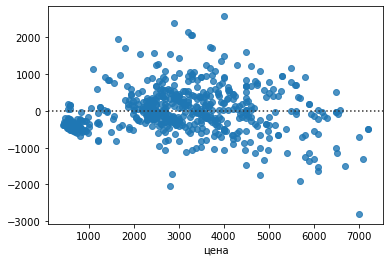

In [76]:
graph = sns.residplot(x=y, y=preds)

Text(0.5, 6.79999999999999, 'residuals')

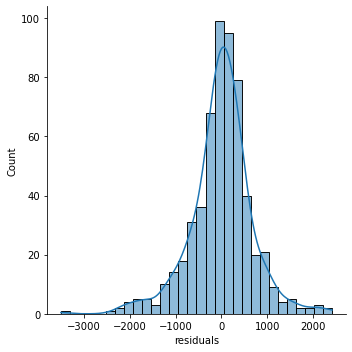

In [77]:
sns.displot(residuals, bins=30, kde=True)
plt.xlabel('residuals')

In [78]:
y.iloc[:25]

Код объекта
5757236    2390.0
5535905     920.0
4644398    3250.0
5667276    3590.0
4644417    4500.0
3854655    2550.0
5757173    3000.0
5103276     800.0
5758058    4700.0
4525390    2970.0
4469870    4000.0
5760725    2450.0
5553000     570.0
4265258    4200.0
2987059    1190.0
5759101    2700.0
3598170    1999.0
5109065    3200.0
5758617    5500.0
5593171     649.0
5751111    4000.0
5760211    2350.0
3602019     590.0
4522037     700.0
3684339     990.0
Name: цена, dtype: float64

In [79]:
preds[:25]

array([2760.30769231,  766.16666667, 4273.75      , 3661.81818182,
       5072.25      , 3928.        , 3282.        ,  766.16666667,
       5216.66666667, 3282.        , 4735.42857143, 2447.42307692,
        766.16666667, 4314.14285714, 2109.88888889, 2447.42307692,
       1665.38461538, 3982.5       , 5072.25      ,  574.54545455,
       3282.        , 2760.30769231,  766.16666667,  766.16666667,
        744.5       ])

## Checking dummmy predictions
predict price based on flat_type

In [80]:
means = X.join(y).groupby('Серия')['цена'].mean()
means

Серия
1-335         2871.428571
1-335А        4342.500000
2-68-1-0      3490.000000
335-с         3652.500000
75            3449.758065
75.1, 3-75    3949.000000
А-1           2455.000000
Бреж          2920.000000
Инд           3413.751843
Общ            720.693333
Хрущ          2934.285714
Name: цена, dtype: float64

In [81]:
dummy_preds = X['Серия'].transform(lambda x: means[x]).values

In [82]:
mean_squared_error(dummy_preds,y)

1403962.814156493

In [83]:
mean_absolute_error(dummy_preds,y)

888.1138730402912

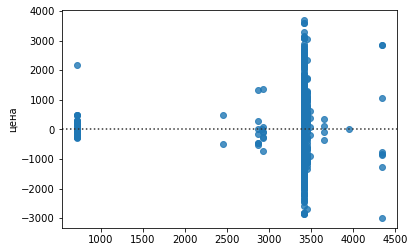

In [84]:
graph = sns.residplot(x=dummy_preds, y=y)


In [85]:
residuals_dummy = dummy_preds - y

Text(0.5, 6.79999999999999, 'residuals')

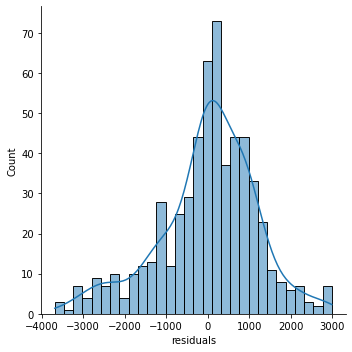

In [86]:
sns.displot(residuals_dummy, bins=30, kde=True)
plt.xlabel('residuals')

### models performs better then dummy regressor
I conclude that model works

# ATTENTION, it is draft

In [87]:
raise NotImplementedError('This block is not ready')

NotImplementedError: This block is not ready

In [ ]:
def models_benchmark(models, X,y=y):
    best_score = float('-inf')
    best_model = None
    df = pd.DataFrame({
        'model': [type(model).__name__ for model in models],
        'score' : [None for i in range(len(models))],
        'mse' : [None for i in range(len(models))],
        'mae' : [None for i in range(len(models))]
    })
    for model in models:
        model_name = type(model).__name__ 
        score = cross_val_score(model, X, y, cv=5)
        mean_score = score.mean()
        
        preds = cross_val_predict(model, X,y,cv=5)
        mae = mean_absolute_error(preds,y)
        mse = mean_squared_error(preds,y)
        
        df.loc[df.model == model_name, 'score'] = mean_score
        df.loc[df.model == model_name, 'mse'] = mse
        df.loc[df.model == model_name, 'mae'] = mae
    return df


In [ ]:
models = [DecisionTreeRegressor(random_state=42),
          RandomForestRegressor(random_state=42),
          SVR(),
          LinearRegression(),
          Ridge(random_state=42),
         BayesianRidge(),
         KNeighborsRegressor(),
         GradientBoostingRegressor(random_state=42)]

In [ ]:
perfomance1 = models_benchmark(models,X_dummy_renovation)
perfomance2 = models_benchmark(models,X_dummy_no_renovation)

### with labeling renovation

In [ ]:
perfomance1.sort_values('score', ascending=False)

### without labeling renovation

In [ ]:
perfomance2.sort_values('score', ascending=False)

## Find best parameters for best model

In [ ]:
estimator = GradientBoostingRegressor(random_state=42)
params = {#'learning_rate': [0.01],
          #'n_estimators' : [1000],
          'min_samples_split' : [i for i in range(2,10)],
          'min_samples_leaf' : [i for i in range(1,10)],
          'min_weight_fraction_leaf' : [0.0,0.1,0.01,0.2],
          'max_depth' : [i for i in range(2,10)],
          'max_features':[n_features/10 for n_features in range(1,11)],
          'max_leaf_nodes' : [None, 2,3,4,5,6,7,8,9,10,11,12,13,14,15],
         }

In [ ]:
grid = GridSearchCV(estimator, params, verbose=True)

In [ ]:
grid.fit(X_dummy, y)

In [ ]:
best_params = grid.best_params_
best_params

In [ ]:
#model = DecisionTreeRegressor(random_state=42, max_depth=6, min_samples_split=8)

In [ ]:
#model = DecisionTreeRegressor(random_state=42, max_depth=6, min_samples_leaf=4, min_samples_split=9) # 9?
model = RandomForestRegressor(random_state=42, max_depth=13)

In [ ]:
#model = DecisionTreeRegressor(random_state=42, max_depth=8, min_samples_leaf=5, min_samples_split=2,max_features=0.9)

In [ ]:
model = GradientBoostingRegressor(random_state=42, **best_params)

In [ ]:
score = cross_val_score(model, X_dummy, y, cv=5)
score.mean()

In [ ]:
score

In [ ]:
preds = cross_val_predict(model, X_dummy, y, cv=5)

In [ ]:
mean_squared_error(preds, y)

In [ ]:
mean_absolute_error(preds, y)

In [ ]:
residuals = preds - y

In [ ]:
graph = sns.residplot(x=y, y=preds)
#graph.axhline(795,color='red')
#graph.axhline(-501,color='red')

In [ ]:
sns.displot(residuals, bins=30, kde=True)
plt.xlabel('residuals')

In [ ]:
y.iloc[:25]

In [ ]:
preds[:25]

In [ ]:
# Use it only for DecisionTreeRegressor
#plt.figure(figsize=(75,25))
#model.fit(X_dummy,y)
#plot_tree(model, feature_names=X_dummy.columns, filled=True, fontsize=14)